# Eigenvalue Problems: The Power Method

## Introduction

Eigenvalue problems are fundamental in computational science, appearing in applications ranging from quantum mechanics to principal component analysis. Given a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$, we seek scalar $\lambda$ and non-zero vector $\mathbf{v}$ satisfying:

$$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$$

## The Power Method

The **Power Method** (also known as power iteration) is an iterative algorithm for finding the **dominant eigenvalue** $\lambda_1$ (the eigenvalue with largest absolute value) and its corresponding eigenvector.

### Algorithm

Starting with an initial guess $\mathbf{v}^{(0)}$, the iteration proceeds as:

$$\mathbf{w}^{(k+1)} = \mathbf{A}\mathbf{v}^{(k)}$$

$$\mathbf{v}^{(k+1)} = \frac{\mathbf{w}^{(k+1)}}{\|\mathbf{w}^{(k+1)}\|}$$

The eigenvalue estimate at iteration $k$ is obtained via the **Rayleigh quotient**:

$$\lambda^{(k)} = \frac{(\mathbf{v}^{(k)})^T \mathbf{A} \mathbf{v}^{(k)}}{(\mathbf{v}^{(k)})^T \mathbf{v}^{(k)}}$$

### Convergence Analysis

Let $\mathbf{A}$ have eigenvalues $|\lambda_1| > |\lambda_2| \geq \ldots \geq |\lambda_n|$ with corresponding eigenvectors $\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n$. If the initial vector has a non-zero component in the direction of $\mathbf{u}_1$:

$$\mathbf{v}^{(0)} = c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2 + \ldots + c_n \mathbf{u}_n, \quad c_1 \neq 0$$

Then after $k$ iterations:

$$\mathbf{A}^k \mathbf{v}^{(0)} = \lambda_1^k \left[ c_1 \mathbf{u}_1 + c_2 \left(\frac{\lambda_2}{\lambda_1}\right)^k \mathbf{u}_2 + \ldots \right]$$

The convergence rate is determined by the ratio $|\lambda_2/\lambda_1|$. The error decreases as:

$$\|\mathbf{v}^{(k)} - \mathbf{u}_1\| = O\left(\left|\frac{\lambda_2}{\lambda_1}\right|^k\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, eig

np.random.seed(42)

## Implementation of the Power Method

In [2]:
def power_method(A, v0=None, max_iter=100, tol=1e-10):
    """
    Power method for finding the dominant eigenvalue and eigenvector.
    
    Parameters
    ----------
    A : ndarray
        Square matrix (n x n)
    v0 : ndarray, optional
        Initial guess for eigenvector
    max_iter : int
        Maximum number of iterations
    tol : float
        Convergence tolerance
    
    Returns
    -------
    eigenvalue : float
        Dominant eigenvalue estimate
    eigenvector : ndarray
        Corresponding eigenvector
    eigenvalue_history : list
        Eigenvalue estimates at each iteration
    error_history : list
        Convergence error at each iteration
    """
    n = A.shape[0]
    
    # Initialize with random vector if not provided
    if v0 is None:
        v = np.random.rand(n)
    else:
        v = v0.copy()
    
    v = v / norm(v)
    
    eigenvalue_history = []
    error_history = []
    
    for k in range(max_iter):
        # Power iteration step
        w = A @ v
        
        # Rayleigh quotient for eigenvalue estimate
        eigenvalue = v @ w
        eigenvalue_history.append(eigenvalue)
        
        # Normalize
        v_new = w / norm(w)
        
        # Check convergence
        error = norm(v_new - v)
        error_history.append(error)
        
        v = v_new
        
        if error < tol:
            break
    
    return eigenvalue, v, eigenvalue_history, error_history

## Example 1: Symmetric Positive Definite Matrix

We first test on a symmetric positive definite matrix with well-separated eigenvalues.

In [3]:
# Create a symmetric matrix with known eigenvalues
# We construct A = Q * D * Q^T where D is diagonal
n = 5
eigenvalues_true = np.array([10.0, 5.0, 2.0, 1.0, 0.5])
D = np.diag(eigenvalues_true)

# Random orthogonal matrix via QR decomposition
Q, _ = np.linalg.qr(np.random.randn(n, n))
A = Q @ D @ Q.T

print("Matrix A:")
print(A.round(4))
print("\nTrue eigenvalues:", eigenvalues_true)

Matrix A:
[[ 2.1654 -0.2441 -0.5202 -0.2893  2.3407]
 [-0.2441  3.9939 -0.2299 -1.1164 -1.3777]
 [-0.5202 -0.2299  1.7348  1.6377 -1.8455]
 [-0.2893 -1.1164  1.6377  3.0568 -2.2262]
 [ 2.3407 -1.3777 -1.8455 -2.2262  7.5491]]

True eigenvalues: [10.   5.   2.   1.   0.5]


In [4]:
# Apply power method
lambda_est, v_est, lambda_hist, error_hist = power_method(A, max_iter=50)

print(f"Estimated dominant eigenvalue: {lambda_est:.10f}")
print(f"True dominant eigenvalue: {eigenvalues_true[0]:.10f}")
print(f"Absolute error: {abs(lambda_est - eigenvalues_true[0]):.2e}")
print(f"\nConverged in {len(error_hist)} iterations")

Estimated dominant eigenvalue: 10.0000000000
True dominant eigenvalue: 10.0000000000
Absolute error: 3.55e-15

Converged in 33 iterations


## Example 2: Convergence Rate Analysis

The theoretical convergence rate is $|\lambda_2/\lambda_1|^k$. Let's verify this numerically.

In [5]:
# Verify eigenvalue using numpy
eigenvalues_np, eigenvectors_np = eig(A)
idx = np.argsort(np.abs(eigenvalues_np))[::-1]
eigenvalues_np = eigenvalues_np[idx]

# Theoretical convergence ratio
ratio = abs(eigenvalues_np[1] / eigenvalues_np[0])
print(f"Ratio |λ₂/λ₁| = {ratio:.4f}")
print(f"Expected convergence rate: {ratio:.4f}^k")

Ratio |λ₂/λ₁| = 0.5000
Expected convergence rate: 0.5000^k


In [6]:
# Compute eigenvalue errors
eigenvalue_errors = np.abs(np.array(lambda_hist) - eigenvalues_true[0])

# Theoretical error decay
k_values = np.arange(len(lambda_hist))
theoretical_decay = eigenvalue_errors[0] * (ratio ** k_values)

## Example 3: Effect of Eigenvalue Separation

We compare convergence for matrices with different eigenvalue separations.

In [7]:
# Test different eigenvalue ratios
ratios_to_test = [0.1, 0.5, 0.9, 0.99]
results = {}

for r in ratios_to_test:
    # Create matrix with specified ratio
    eigenvalues_test = np.array([10.0, 10.0 * r, 1.0, 0.5, 0.1])
    D_test = np.diag(eigenvalues_test)
    A_test = Q @ D_test @ Q.T
    
    # Run power method
    _, _, lambda_hist_test, _ = power_method(A_test, max_iter=100)
    
    # Store errors
    errors = np.abs(np.array(lambda_hist_test) - eigenvalues_test[0])
    results[r] = errors

print("Convergence analysis complete for ratios:", ratios_to_test)

Convergence analysis complete for ratios: [0.1, 0.5, 0.9, 0.99]


## Visualization of Results

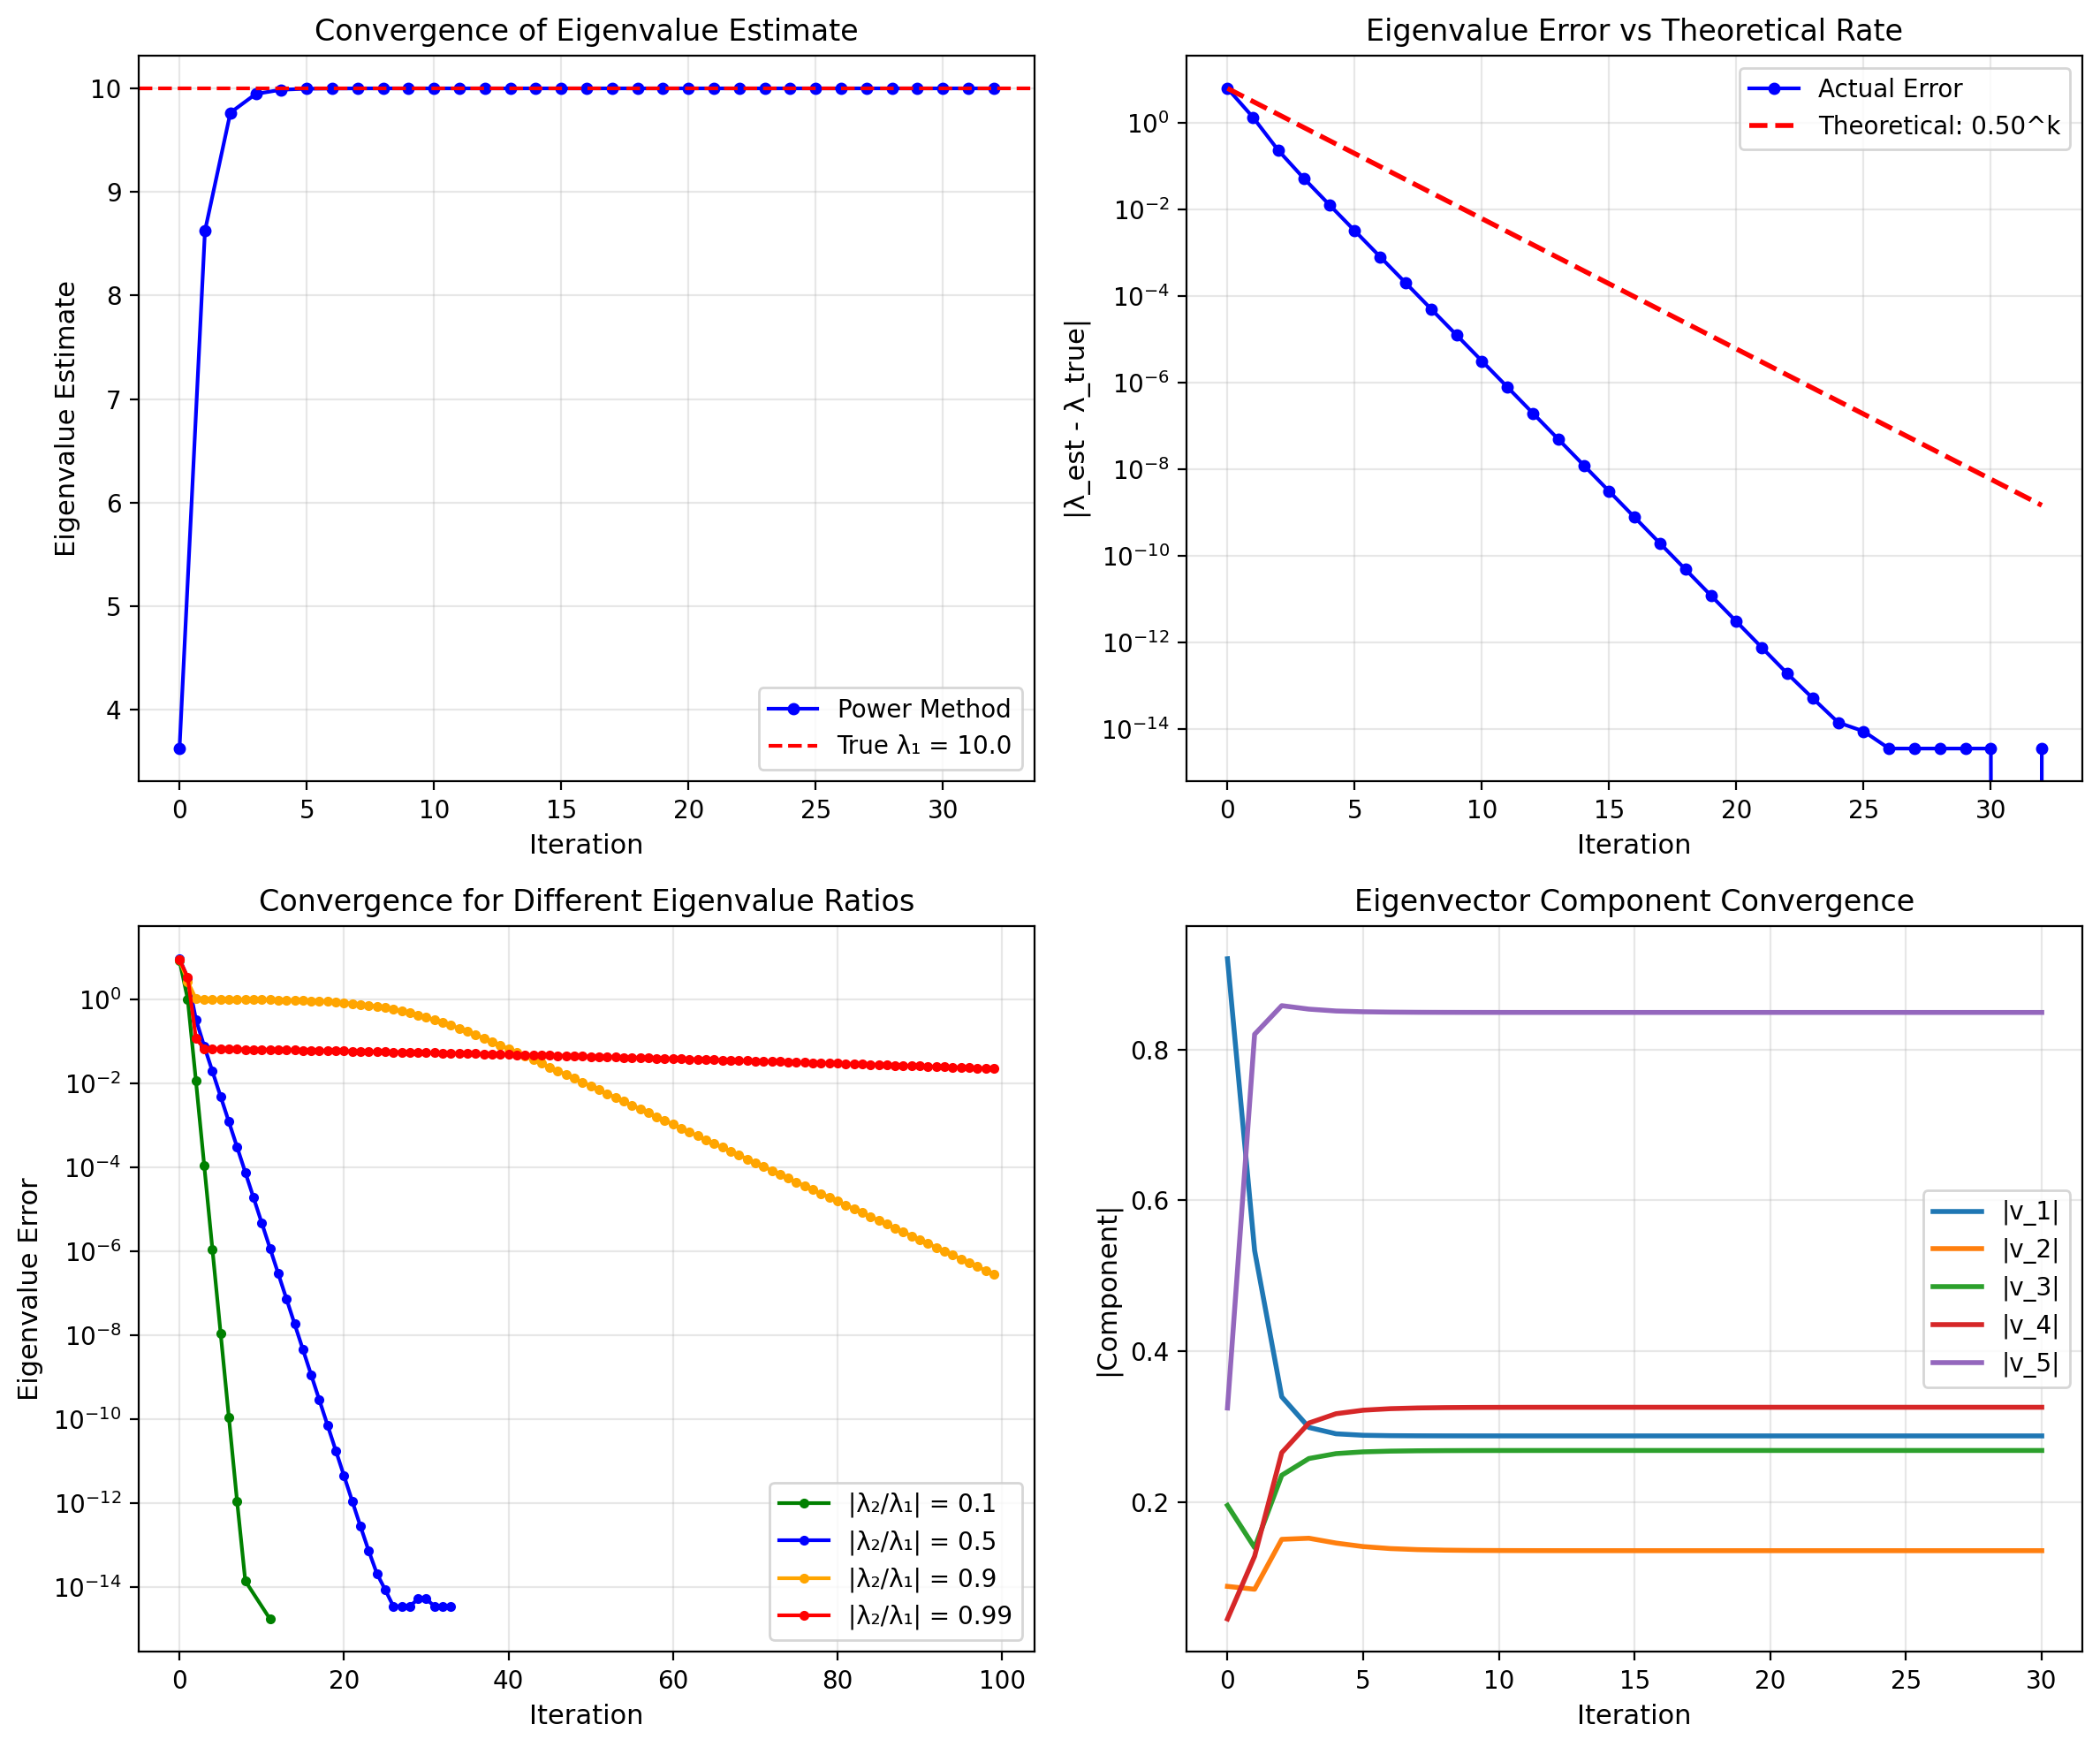


Figure saved to plot.png


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Eigenvalue convergence
ax1 = axes[0, 0]
ax1.plot(lambda_hist, 'b-o', markersize=4, label='Power Method')
ax1.axhline(y=eigenvalues_true[0], color='r', linestyle='--', label=f'True λ₁ = {eigenvalues_true[0]}')
ax1.set_xlabel('Iteration', fontsize=11)
ax1.set_ylabel('Eigenvalue Estimate', fontsize=11)
ax1.set_title('Convergence of Eigenvalue Estimate', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Error decay (log scale)
ax2 = axes[0, 1]
ax2.semilogy(eigenvalue_errors, 'b-o', markersize=4, label='Actual Error')
ax2.semilogy(theoretical_decay, 'r--', linewidth=2, label=f'Theoretical: {ratio:.2f}^k')
ax2.set_xlabel('Iteration', fontsize=11)
ax2.set_ylabel('|λ_est - λ_true|', fontsize=11)
ax2.set_title('Eigenvalue Error vs Theoretical Rate', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Effect of eigenvalue separation
ax3 = axes[1, 0]
colors = ['green', 'blue', 'orange', 'red']
for (r, errors), c in zip(results.items(), colors):
    # Only plot non-zero errors
    mask = errors > 1e-16
    if np.any(mask):
        ax3.semilogy(np.where(mask)[0], errors[mask], '-o', markersize=3, 
                    color=c, label=f'|λ₂/λ₁| = {r}')
ax3.set_xlabel('Iteration', fontsize=11)
ax3.set_ylabel('Eigenvalue Error', fontsize=11)
ax3.set_title('Convergence for Different Eigenvalue Ratios', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Eigenvector component convergence
ax4 = axes[1, 1]

# Run power method tracking eigenvector components
v = np.random.rand(n)
v = v / norm(v)
v_history = [v.copy()]

for _ in range(30):
    w = A @ v
    v = w / norm(w)
    v_history.append(v.copy())

v_history = np.array(v_history)

for i in range(n):
    ax4.plot(np.abs(v_history[:, i]), '-', linewidth=2, label=f'|v_{i+1}|')

ax4.set_xlabel('Iteration', fontsize=11)
ax4.set_ylabel('|Component|', fontsize=11)
ax4.set_title('Eigenvector Component Convergence', fontsize=12)
ax4.legend(loc='right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eigenvalue_problems_power_method_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to plot.png")

## Summary

The Power Method provides a simple and robust approach for computing the dominant eigenvalue:

1. **Simplicity**: Only requires matrix-vector multiplication
2. **Convergence**: Linear convergence with rate $|\lambda_2/\lambda_1|$
3. **Memory efficient**: Only stores vectors, not the full matrix decomposition

### Limitations

- Only finds the **dominant** eigenvalue
- Convergence can be slow when $|\lambda_2| \approx |\lambda_1|$
- Fails if the dominant eigenvalue is complex or has multiplicity > 1

### Extensions

- **Inverse Power Method**: Find smallest eigenvalue by applying power method to $\mathbf{A}^{-1}$
- **Shifted Inverse Iteration**: Find eigenvalue closest to a shift $\sigma$ using $(\mathbf{A} - \sigma \mathbf{I})^{-1}$
- **Rayleigh Quotient Iteration**: Use adaptive shifts for cubic convergence